# TWAP Analysis

## Purpose
Explore Reflexer TWAP.

## Outline

1) Prep Data
2) Prod TWAP
3) TWAP from spot RAI/USD and spot ETH/USD
4) TWAP from spot RAI/USD and spot ETH/USD, with 1min ETH/USD sampling
5) TWAP from sport RAI/USD with 4H sampling

### Number of most recent minutes to display for all plots

In [1]:
N_PLOTS = 10000

In [2]:
import time
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
from graph_util import fetch_medianizer

In [3]:
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 200 


## Prep data

In [4]:
df_twap = pd.read_csv('data/twap.csv')
df_rai = pd.read_csv('data/link_rai.csv')
df_influx = pd.read_csv('data/influx.csv')

In [5]:
df_influx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5359 entries, 0 to 5358
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  5359 non-null   object 
 1   rai_usd    5359 non-null   float64
 2   Source     5359 non-null   object 
dtypes: float64(1), object(2)
memory usage: 125.7+ KB


In [6]:
df_rai['price'] /= 1E8

In [7]:
df_rai.tail()

,block,price,ts,started_at
53304,13462168,3.02978,1634803412,1634803412
53305,13462169,3.02978,1634803412,1634803412
53306,13462170,3.02978,1634803412,1634803412
53307,13462171,3.02978,1634803412,1634803412
53308,13462172,3.02978,1634803412,1634803412


In [8]:
df_twap.head()

,rai_usd,block_number
0,3.035562,13405713
1,3.035562,13405714
2,3.035562,13405715
3,3.035562,13405716
4,3.035562,13405717


(array([-1000.,     0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.]),
 [Text(-1000.0, 0, '2021-10-19T17:04:09Z'),
  Text(0.0, 0, '2021-10-13T08:03:09Z'),
  Text(1000.0, 0, '2021-10-14T19:03:23Z'),
  Text(2000.0, 0, '2021-10-16T07:35:14Z'),
  Text(3000.0, 0, '2021-10-17T18:03:05Z'),
  Text(4000.0, 0, '2021-10-19T04:41:19Z'),
  Text(5000.0, 0, '2021-10-20T15:48:35Z'),
  Text(6000.0, 0, '')])

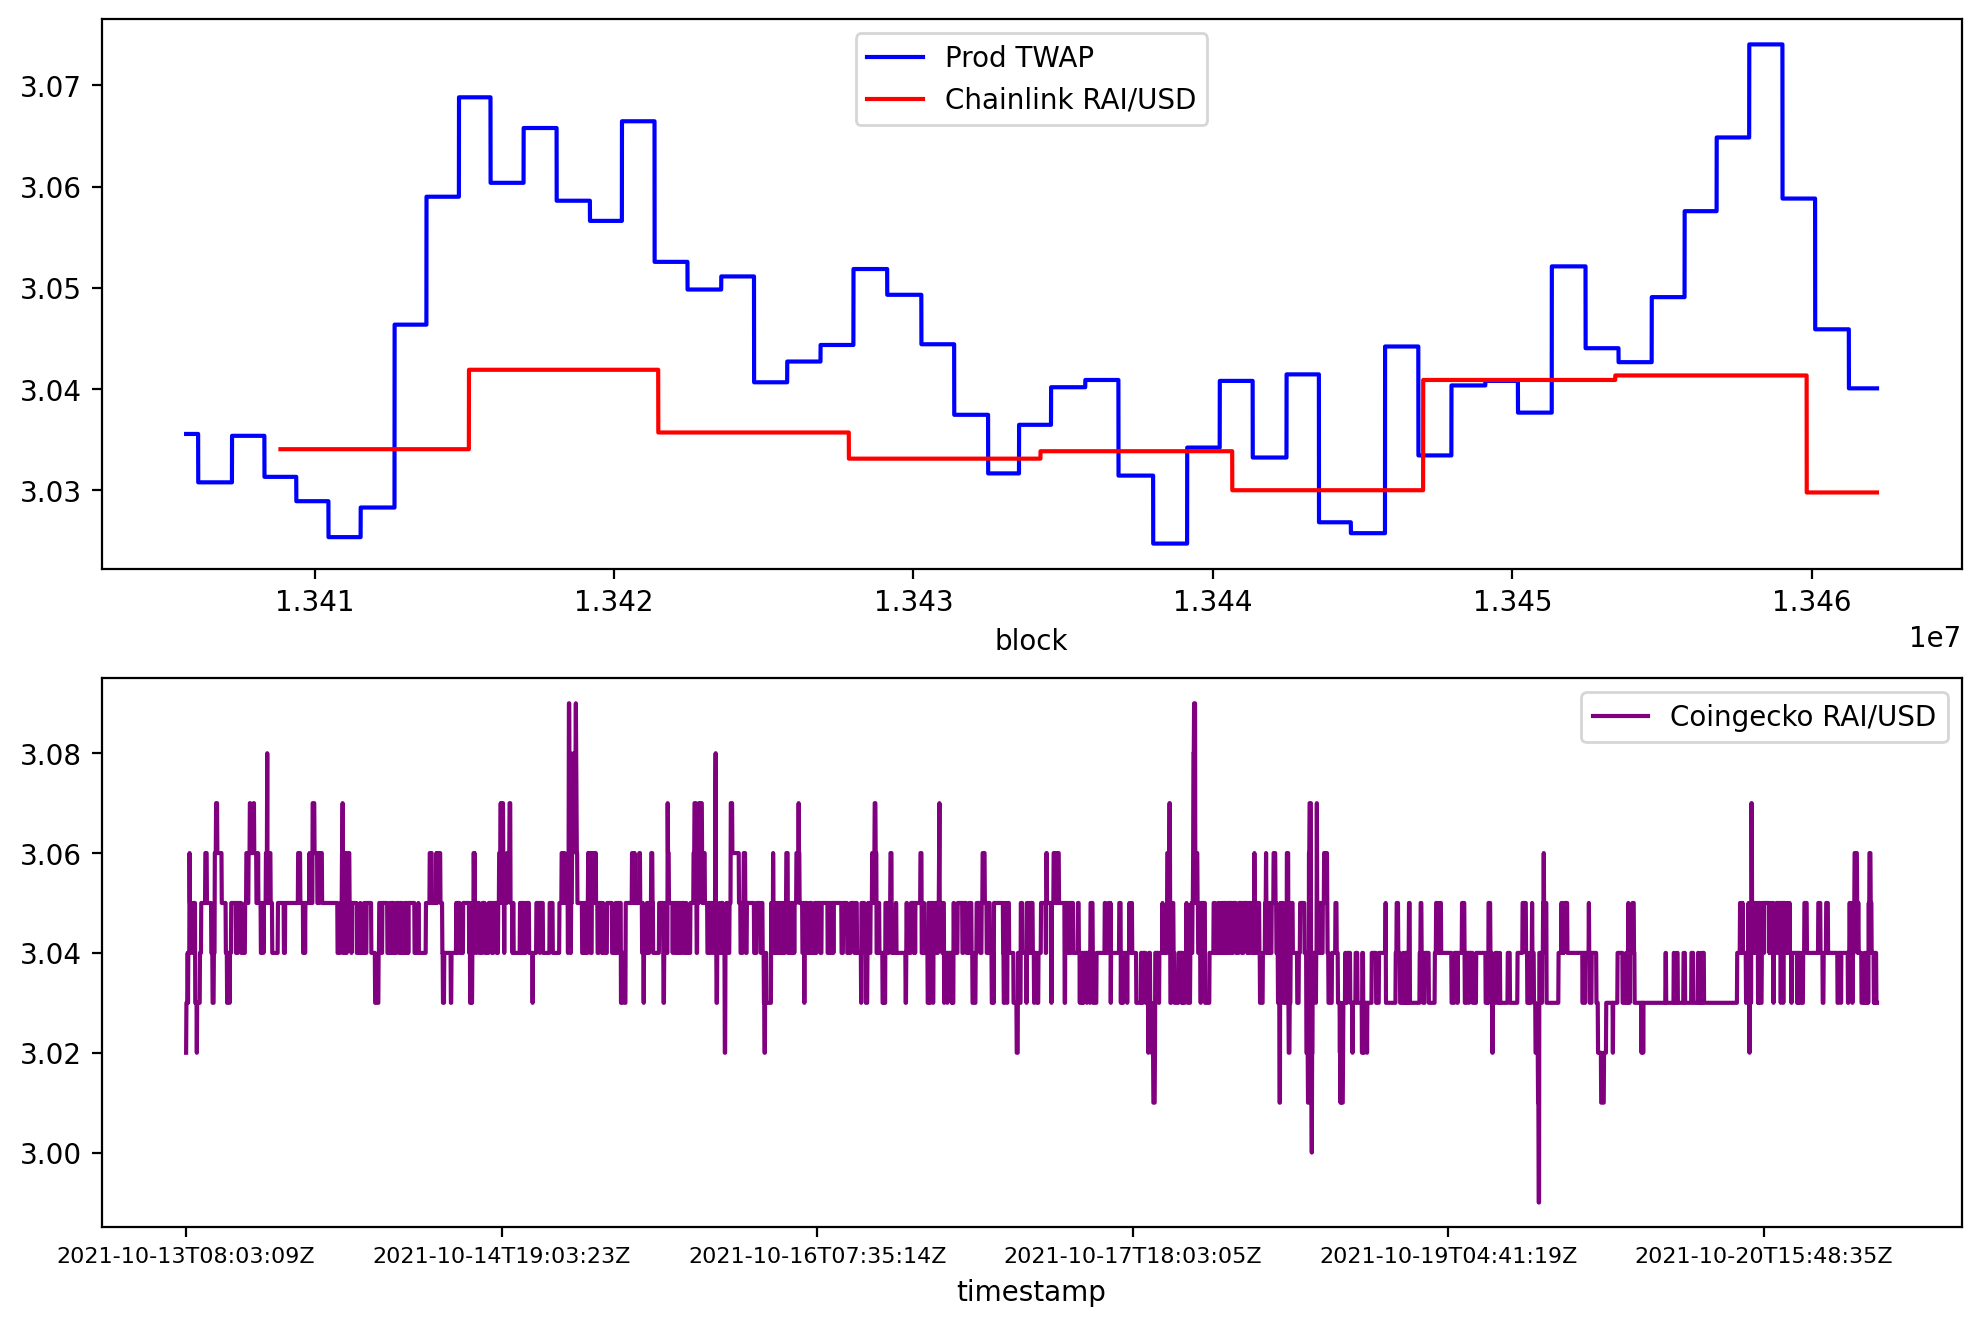

In [13]:
fig, ax = plt.subplots(2, 1)
df_twap.plot(x='block_number', y='rai_usd', ax=ax[0], label='Prod TWAP', color='blue')
df_rai.plot(x='block', y='price', ax=ax[0], label='Chainlink RAI/USD', color='red')

df_influx.plot(x='timestamp', y='rai_usd', ax=ax[1], label='Coingecko RAI/USD', color='purple')
plt.xticks(fontsize=8)
